### The following Installs Requirements.

In [ ]:
%pip install numpy
%pip install matplotlib

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

### The following Code Reads the Data.

In [ ]:
##Experiment 5: Created the box plots. Each plot, y-axis:work and x-axis:algs, for one weight.
weight_to_int = {"1.50":0, "2.00":1, '3.00':2, '4.00':3, '5.00':4, '6.00':5, '7.00':6, '8.00':7, '9.00':8, '10.00':9}
int_to_alg = {0:'WA*', 1:'pwXD', 2:'pwXU', 3:'XDP', 4:'XUP', 5:'DSMAP'}
numPolicies = len(int_to_alg)
fileName = 'mazes32-results'
Weights = {"1.50":[], "2.00":[], '3.00':[], '4.00':[], '5.00':[], '6.00':[], '7.00':[], '8.00':[], '9.00':[], '10.00':[]}
for w in Weights.values():
    for i in range(numPolicies):
        a = []
        w.append(a)

cnt = 0
with open("./results/"+fileName+".txt", "r") as f:
    numLines = len(f.readlines())
with open("./results/"+fileName+".txt", "r") as f:
    for line in f:
        data = line.split()
        if(len(data)): ## To check for empy lines
            if data[0] == "MAP" and (data[7] in list(weight_to_int.keys())) and (int(data[5]) in list(int_to_alg.keys())):
                Weights[data[7]][int(data[5])].append(int(data[9]))
            if data[0] == "STP" and (data[5] in list(weight_to_int.keys())) and (int(data[3]) in list(int_to_alg.keys())):
                Weights[data[5]][int(data[3])].append(int(data[7]))

        cnt += 1
        if cnt/numLines*100 % 10 == 0:
            print(cnt/numLines*100, '%')
print("Done Reading the Data..")

### The following Code Creates Box Plots.
one plot for each weight, each containing #policies boxes.

In [ ]:
for w in range(len(Weights.values())):
    data = []
    for alg in list(Weights.values())[w]:
        data.append(np.array(alg))

    fig, ax = plt.subplots()

    bp = ax.boxplot(data, showfliers=False, notch=True, sym='o', vert=True, whis=(5,95))
    # bp = ax.boxplot(data, showfliers=False, notch=False, sym='+', vert=True, whis=1.5)
    ax.set_yscale('log')
    
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='o')
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.8)
    ax.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=fileName + ' Plot for Weight=' + list(Weights.keys())[w],
        xlabel='Policies',
        ylabel='work',
    )

    box_colors = ['darkkhaki', 'royalblue']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax.plot(np.average(med.get_xdata()), np.average(data[i]),
                color='r', marker='*', markeredgecolor='k')
        
    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    upper_labels = [str(round(s, 2)) for s in medians]
    thickness = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax.get_xticklabels()):

        ax.text(pos[tick], .97, upper_labels[tick],
                transform=ax.get_xaxis_transform(), weight=thickness[1],
                horizontalalignment='center', size='x-small')

    y_pos = np.arange(len(int_to_alg.values())+1)
    labels = ['']
    labels += list(int_to_alg.values())
    plt.xticks(y_pos, labels)

    plt.show()
    print('Box information:')
    for alg in range(len(data)):
        median = np.median(data[alg])
        average = np.average(data[alg])

        upper_quartile = np.percentile(data[alg], 75)
        lower_quartile = np.percentile(data[alg], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = data[alg][data[alg]<=upper_quartile+1.5*iqr].max()
        lower_whisker = data[alg][data[alg]>=lower_quartile-1.5*iqr].min()

        print(' Policy: '+int_to_alg[alg])
        print(' median: ', median)
        print(' average: ', round(average, 2))
        print(' upper_quartile: ', upper_quartile)
        print(' lower_quartile: ', lower_quartile)
        print(' upper_whisker: ', upper_whisker)
        print(' lower_whisker: ', lower_whisker)
        print()
    print('====================================')

### The following Code Creates Violin Plots.
one plot for each weight, each containing #policies violins.

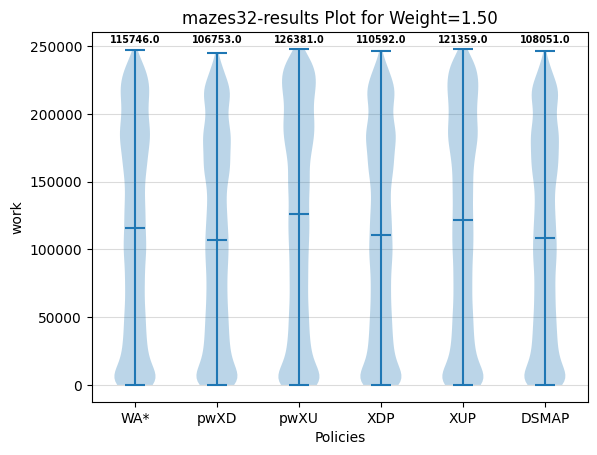

Box information:
 Policy WA*
 median 115746.0
 average 114023.67

 Policy pwXD
 median 106753.0
 average 108103.99

 Policy pwXU
 median 126381.0
 average 120868.48

 Policy XDP
 median 110592.0
 average 110570.01

 Policy XUP
 median 121359.0
 average 117972.89

 Policy DSMAP
 median 108051.0
 average 108805.32



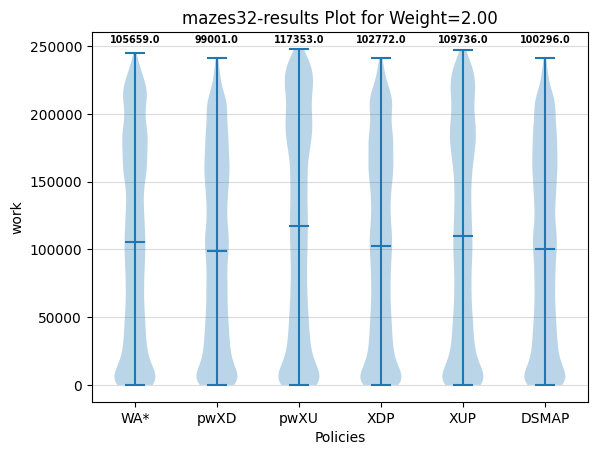

Box information:
 Policy WA*
 median 105659.0
 average 106831.2

 Policy pwXD
 median 99001.0
 average 99687.21

 Policy pwXU
 median 117353.0
 average 115518.59

 Policy XDP
 median 102772.0
 average 103136.84

 Policy XUP
 median 109736.0
 average 111076.62

 Policy DSMAP
 median 100296.0
 average 100894.28



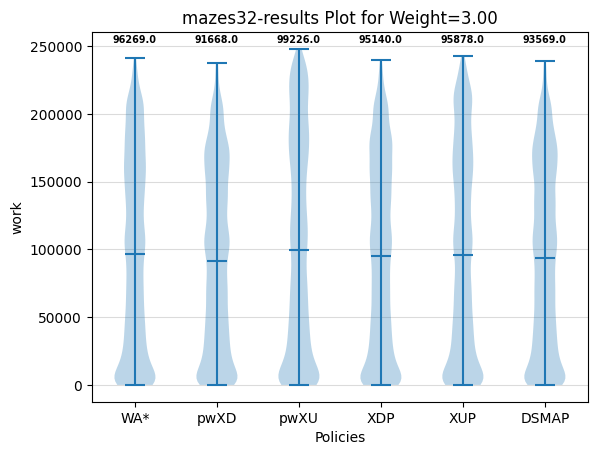

Box information:
 Policy WA*
 median 96269.0
 average 97434.64

 Policy pwXD
 median 91668.0
 average 93288.19

 Policy pwXU
 median 99226.0
 average 104269.19

 Policy XDP
 median 95140.0
 average 95836.31

 Policy XUP
 median 95878.0
 average 99209.87

 Policy DSMAP
 median 93569.0
 average 94544.74



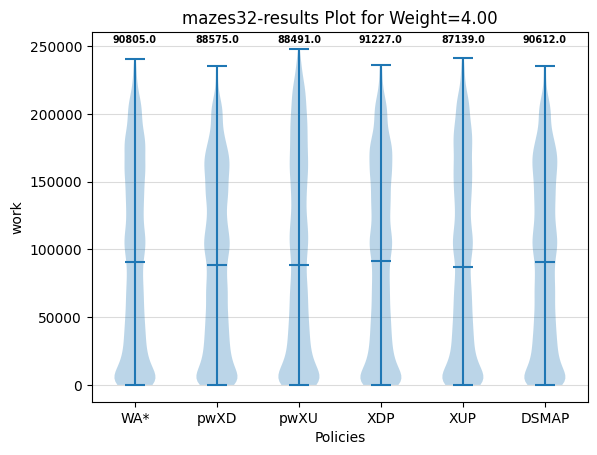

Box information:
 Policy WA*
 median 90805.0
 average 93102.05

 Policy pwXD
 median 88575.0
 average 90365.38

 Policy pwXU
 median 88491.0
 average 95242.84

 Policy XDP
 median 91227.0
 average 92352.68

 Policy XUP
 median 87139.0
 average 92034.65

 Policy DSMAP
 median 90612.0
 average 91581.58



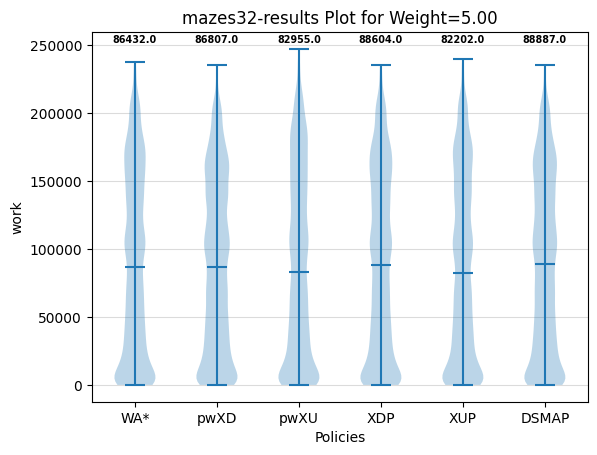

Box information:
 Policy WA*
 median 86432.0
 average 90005.73

 Policy pwXD
 median 86807.0
 average 88694.81

 Policy pwXU
 median 82955.0
 average 89556.91

 Policy XDP
 median 88604.0
 average 90221.64

 Policy XUP
 median 82202.0
 average 88100.5

 Policy DSMAP
 median 88887.0
 average 90028.39



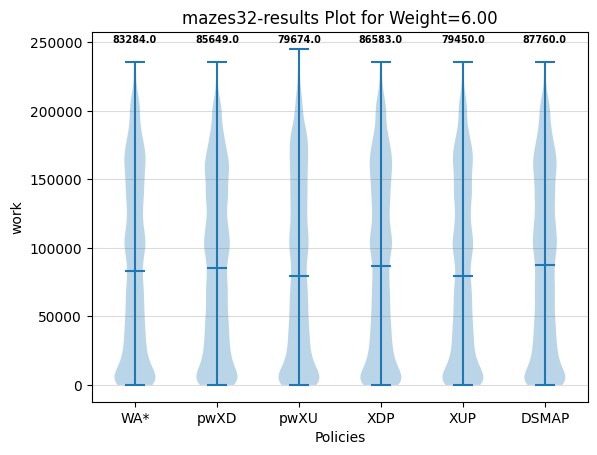

Box information:
 Policy WA*
 median 83284.0
 average 87827.9

 Policy pwXD
 median 85649.0
 average 87624.92

 Policy pwXU
 median 79674.0
 average 86239.34

 Policy XDP
 median 86583.0
 average 88823.09

 Policy XUP
 median 79450.0
 average 85543.72

 Policy DSMAP
 median 87760.0
 average 89122.81



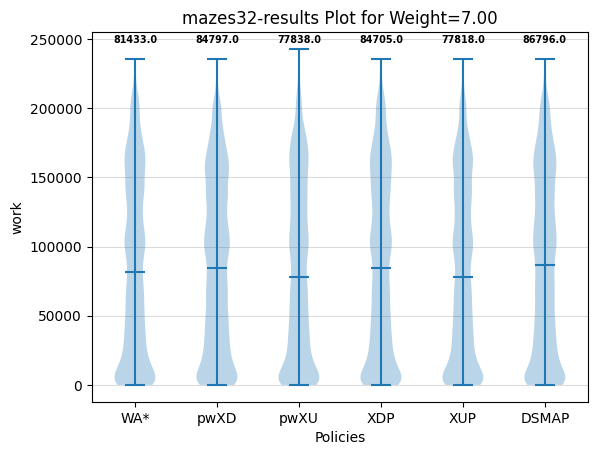

Box information:
 Policy WA*
 median 81433.0
 average 86466.21

 Policy pwXD
 median 84797.0
 average 86903.64

 Policy pwXU
 median 77838.0
 average 84129.45

 Policy XDP
 median 84705.0
 average 87738.93

 Policy XUP
 median 77818.0
 average 83791.59

 Policy DSMAP
 median 86796.0
 average 88514.39



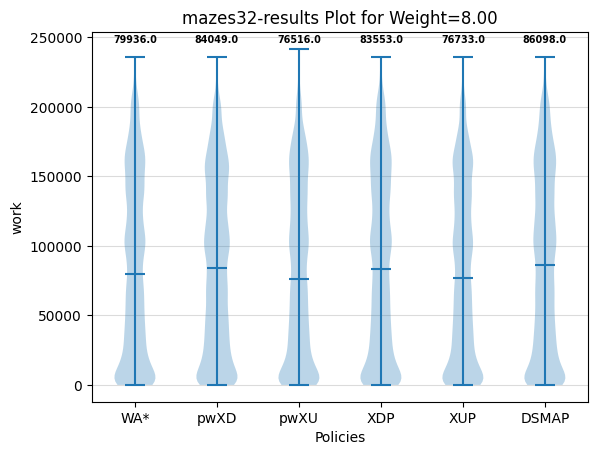

Box information:
 Policy WA*
 median 79936.0
 average 85272.36

 Policy pwXD
 median 84049.0
 average 86381.69

 Policy pwXU
 median 76516.0
 average 82769.17

 Policy XDP
 median 83553.0
 average 86922.36

 Policy XUP
 median 76733.0
 average 82546.79

 Policy DSMAP
 median 86098.0
 average 87896.36



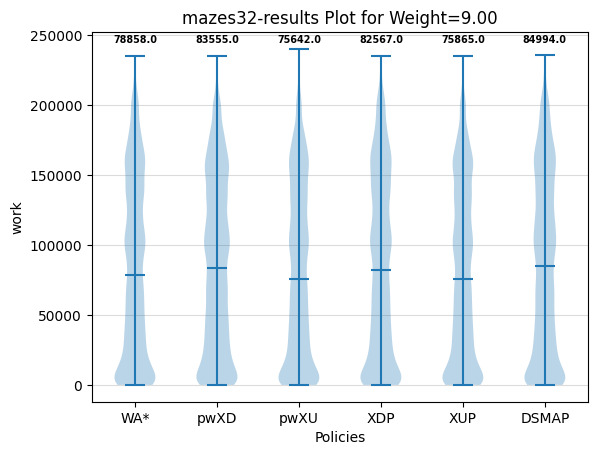

Box information:
 Policy WA*
 median 78858.0
 average 84293.42

 Policy pwXD
 median 83555.0
 average 85975.87

 Policy pwXU
 median 75642.0
 average 81784.9

 Policy XDP
 median 82567.0
 average 86254.48

 Policy XUP
 median 75865.0
 average 81676.84

 Policy DSMAP
 median 84994.0
 average 87136.61



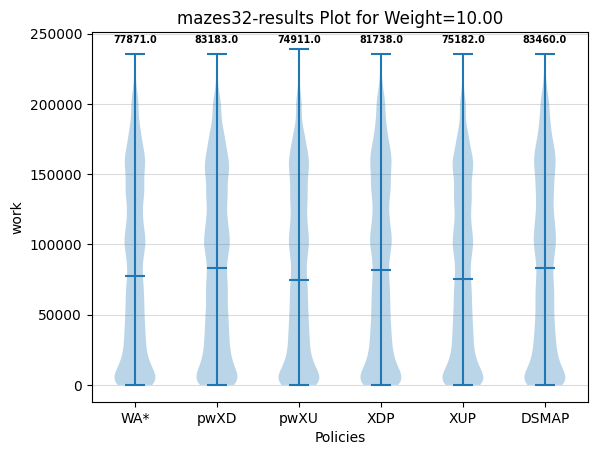

Box information:
 Policy WA*
 median 77871.0
 average 83475.69

 Policy pwXD
 median 83183.0
 average 85645.33

 Policy pwXU
 median 74911.0
 average 81049.08

 Policy XDP
 median 81738.0
 average 85701.89

 Policy XUP
 median 75182.0
 average 81027.5

 Policy DSMAP
 median 83460.0
 average 86141.75



In [93]:
for w in range(len(Weights.values())):
    data = []
    for alg in list(Weights.values())[w]:
        data.append(np.array(alg))
    fig, axs = plt.subplots()

    axs.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.8)
    axs.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=fileName + ' Plot for Weight=' + list(Weights.keys())[w],
        xlabel='Policies',
        ylabel='work',
    )
        
    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    medians = [np.median(data[alg]) for alg in range(len(data))]
    num_violins = len(data)
    pos = np.arange(num_violins) + 1
    upper_labels = [str(round(s, 2)) for s in medians]
    thickness = ['bold', 'semibold']
    for tick, label in zip(range(num_violins), axs.get_xticklabels()):

        axs.text(pos[tick], .97, upper_labels[tick],
                transform=axs.get_xaxis_transform(), weight=thickness[1],
                horizontalalignment='center', size='x-small')

    y_pos = np.arange(len(int_to_alg.values())+1)
    labels = ['']
    labels += list(int_to_alg.values())
    plt.xticks(y_pos, labels)
    

    # plot violin plot
    axs.violinplot(data, showmeans=False, showmedians=True)

    plt.show()
    print('Box information:')
    for alg in range(len(data)):
        median = np.median(data[alg])
        average = np.average(data[alg])

        print(' Policy: '+int_to_alg[alg])
        print(' median: ', median)
        print(' average: ', round(average, 2))
        print()
    print('====================================')